# Read data
##### we import pandas and read and take a look at the data

In [2]:
import pandas as pd
RISK_LEVEL = "RiskLevel"

df = pd.read_csv("./Maternal Health Risk Data Set.csv")
df 

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


#### Other quick reviews ...

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [3]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


#### all categories

In [4]:
df[RISK_LEVEL].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

### Now we convert string data values to numeric values using label encoding

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df[RISK_LEVEL] = label_encoder.fit_transform(df[RISK_LEVEL])
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,0
1010,55,120,90,18.0,98.0,60,0
1011,35,85,60,19.0,98.0,86,0
1012,43,120,90,18.0,98.0,70,0


#### Check for null values

In [6]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

#### Normalize the range of values... this makes our model fit more accurate especially for KNN

In [7]:
from sklearn.preprocessing import MinMaxScaler, minmax_scale

df.iloc[:, :-1] = MinMaxScaler().fit_transform(df.iloc[:, :-1])
df 

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,0.250000,0.666667,0.607843,0.692308,0.0,0.951807,0
1,0.416667,0.777778,0.803922,0.538462,0.0,0.759036,0
2,0.316667,0.222222,0.411765,0.153846,0.4,0.879518,0
3,0.333333,0.777778,0.705882,0.076923,0.0,0.759036,0
4,0.416667,0.555556,0.215686,0.007692,0.0,0.831325,1
...,...,...,...,...,...,...,...
1009,0.200000,0.555556,0.215686,0.692308,0.0,0.879518,0
1010,0.750000,0.555556,0.803922,0.923077,0.0,0.638554,0
1011,0.416667,0.166667,0.215686,1.000000,0.0,0.951807,0
1012,0.550000,0.555556,0.803922,0.923077,0.0,0.759036,0


### Split the features and labels(X and Y)

In [8]:
Y = df[RISK_LEVEL]
X = df.drop(RISK_LEVEL, axis=1)


In [9]:
X

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,0.250000,0.666667,0.607843,0.692308,0.0,0.951807
1,0.416667,0.777778,0.803922,0.538462,0.0,0.759036
2,0.316667,0.222222,0.411765,0.153846,0.4,0.879518
3,0.333333,0.777778,0.705882,0.076923,0.0,0.759036
4,0.416667,0.555556,0.215686,0.007692,0.0,0.831325
...,...,...,...,...,...,...
1009,0.200000,0.555556,0.215686,0.692308,0.0,0.879518
1010,0.750000,0.555556,0.803922,0.923077,0.0,0.638554
1011,0.416667,0.166667,0.215686,1.000000,0.0,0.951807
1012,0.550000,0.555556,0.803922,0.923077,0.0,0.759036


In [10]:
Y

0       0
1       0
2       0
3       0
4       1
       ..
1009    0
1010    0
1011    0
1012    0
1013    2
Name: RiskLevel, Length: 1014, dtype: int64

### Randomly split the dataset to 0.3 test and 0.7 train.

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=None)
x_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
796,0.216667,0.666667,0.411765,0.061538,0.0,0.855422
855,0.166667,0.555556,0.509804,0.077692,0.4,0.759036
422,0.433333,0.777778,1.000000,0.061538,0.8,0.831325
475,0.150000,0.555556,0.607843,0.076923,0.0,0.759036
388,0.216667,0.555556,0.411765,0.138462,0.0,0.759036
...,...,...,...,...,...,...
671,0.083333,0.333333,0.000000,0.061538,0.2,0.843373
189,0.050000,0.222222,0.313725,0.146154,0.6,0.879518
616,0.366667,0.555556,0.607843,0.115385,0.0,0.759036
708,0.150000,0.555556,0.607843,0.076923,0.0,0.759036


In [12]:
x_test

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
1009,0.200000,0.555556,0.215686,0.692308,0.0,0.879518
438,0.333333,0.555556,0.607843,0.061538,0.0,0.759036
574,0.216667,0.222222,0.215686,0.115385,0.0,0.831325
910,0.116667,0.000000,0.019608,0.146154,0.0,0.759036
659,0.433333,0.555556,0.803922,0.076923,0.0,0.903614
...,...,...,...,...,...,...
143,0.250000,0.555556,0.803922,0.053846,0.6,0.879518
768,0.100000,0.333333,0.411765,0.069231,0.0,0.879518
688,0.500000,0.555556,0.803922,0.461538,0.0,0.879518
724,0.350000,0.555556,0.215686,0.007692,0.0,0.831325


## Here we define 3 functions to make our job simple later
#### first one just run the cross_val_score method and pring the result.
#### second fit and test the model on the train part
#### and finally the third one test the model that't been trained on "train" section, on the "test" section of the dataset

In [13]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.metrics import accuracy_score
cv = ShuffleSplit(n_splits=10, random_state=None) 
def runCrossVal(model):
    score = cross_val_score(model, x_train, y_train, cv=cv).mean() * 100
    print(f"accuracy on cross_val_score: {score}")
    return model

def runOnTrain(model):
    model.fit(x_train, y_train)
    predicted_y = model.predict(x_train)
    print(f"accuracy on train: {accuracy_score(y_true=y_train, y_pred=predicted_y)*100}")

def runModelOnTest(model):
    runCrossVal(model)
    runOnTrain(model)
    model.fit(x_train, y_train)
    predicted_y = model.predict(x_test)
    print(f"accuracy on test data: {accuracy_score(y_true=y_test, y_pred=predicted_y)*100}")
    return model, y_test, predicted_y  

## Now we test the model over the dataset

In [14]:
from sklearn.tree import DecisionTreeClassifier as DecisionTree

##### starting by the default parameters ...

In [15]:
runModelOnTest(DecisionTree())
DecisionTree()

accuracy on cross_val_score: 82.67605633802816
accuracy on train: 92.80677009873061
accuracy on test data: 81.9672131147541


DecisionTreeClassifier()

#### Playing with parameters
#### we're checking that the paramter must not make the model overfit and also give us a good accuracy over the "test" section

In [16]:
runModelOnTest(DecisionTree(criterion='entropy', max_depth=12))
DecisionTree(criterion='entropy', max_depth=12)

accuracy on cross_val_score: 81.69014084507043
accuracy on train: 88.57545839210155
accuracy on test data: 78.36065573770492


DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [17]:
runModelOnTest(DecisionTree(splitter="random"))
DecisionTree(splitter="random")

accuracy on cross_val_score: 79.01408450704224
accuracy on train: 92.80677009873061
accuracy on test data: 82.29508196721311


DecisionTreeClassifier(splitter='random')

##### These sounds like the best parameters for DecisionTree. However it looks like it has overfit. but it's not bad for DecisionTree model.

In [18]:
runModelOnTest(DecisionTree(min_samples_split=3))
DecisionTree(min_samples_split=3)

accuracy on cross_val_score: 79.01408450704226
accuracy on train: 92.2425952045134
accuracy on test data: 79.34426229508198


DecisionTreeClassifier(min_samples_split=3)

#### Now KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier as KNN
runModelOnTest(KNN())
KNN()

accuracy on cross_val_score: 67.04225352112675
accuracy on train: 79.12552891396332
accuracy on test data: 69.83606557377048


KNeighborsClassifier()

In [20]:
runModelOnTest(KNN(6))
KNN(6)

accuracy on cross_val_score: 69.43661971830987
accuracy on train: 77.71509167842031
accuracy on test data: 69.83606557377048


KNeighborsClassifier(n_neighbors=6)

In [21]:
runModelOnTest(KNN(7))
KNN(7)

accuracy on cross_val_score: 70.0
accuracy on train: 77.99717912552892
accuracy on test data: 71.47540983606558


KNeighborsClassifier(n_neighbors=7)

In [22]:
runModelOnTest(KNN(4))
KNN(4)

accuracy on cross_val_score: 67.32394366197184
accuracy on train: 81.10014104372355
accuracy on test data: 67.8688524590164


KNeighborsClassifier(n_neighbors=4)

In [23]:
runModelOnTest(KNN(3))
KNN(3)

accuracy on cross_val_score: 70.28169014084507
accuracy on train: 86.31875881523273
accuracy on test data: 67.21311475409836


KNeighborsClassifier(n_neighbors=3)

##### n_neighbors = 2; seems the best parameter

In [24]:
runModelOnTest(KNN(2))
KNN(2)

accuracy on cross_val_score: 71.40845070422534
accuracy on train: 89.42172073342736
accuracy on test data: 75.08196721311475


KNeighborsClassifier(n_neighbors=2)

In [54]:
runModelOnTest(KNN(1))
KNN(1)

accuracy on cross_val_score: 80.70422535211267
accuracy on train: 91.53737658674189
accuracy on test data: 79.67213114754098


KNeighborsClassifier(n_neighbors=1)

In [26]:
from sklearn.svm import SVC
runModelOnTest(SVC())
SVC()

accuracy on cross_val_score: 65.77464788732395
accuracy on train: 67.55994358251057
accuracy on test data: 72.45901639344262


SVC()

In [27]:
runModelOnTest(SVC(C=2))
SVC(C=2)

accuracy on cross_val_score: 68.73239436619718
accuracy on train: 67.55994358251057
accuracy on test data: 72.1311475409836


SVC(C=2)

In [28]:
runModelOnTest(SVC(C=100))
SVC(C=100)

accuracy on cross_val_score: 69.01408450704226
accuracy on train: 77.29196050775741
accuracy on test data: 65.24590163934427


SVC(C=100)

#### And this seems the best for SVC

In [29]:
runModelOnTest(SVC(C=100, gamma=1))
SVC(C=100, gamma=1)

accuracy on cross_val_score: 66.47887323943662
accuracy on train: 73.90691114245416
accuracy on test data: 71.47540983606558


SVC(C=100, gamma=1)

In [30]:
runModelOnTest(SVC(C=100, gamma=1, coef0=0.2))
SVC(C=100, gamma=1, coef0=0.2)

accuracy on cross_val_score: 65.49295774647888
accuracy on train: 73.90691114245416
accuracy on test data: 71.47540983606558


SVC(C=100, coef0=0.2, gamma=1)

In [31]:
runModelOnTest(SVC(C=100, coef0=0.1, kernel="linear"))
SVC(C=100, coef0=0.1, kernel="linear")

accuracy on cross_val_score: 60.28169014084506
accuracy on train: 63.18758815232722
accuracy on test data: 68.52459016393443


SVC(C=100, coef0=0.1, kernel='linear')

In [32]:
runModelOnTest(SVC(C=2, coef0=0.1, kernel="sigmoid"))
SVC(C=2, coef0=0.1, kernel="sigmoid")

accuracy on cross_val_score: 19.859154929577468
accuracy on train: 20.87447108603667
accuracy on test data: 24.59016393442623


SVC(C=2, coef0=0.1, kernel='sigmoid')

### Now the RandomForest

#### it seems that it has overfit a lot. we play with parameters to avoid that

In [33]:
from sklearn.ensemble import RandomForestClassifier as RandomForest
runModelOnTest(RandomForest())
RandomForest()

accuracy on cross_val_score: 82.11267605633805
accuracy on train: 92.80677009873061
accuracy on test data: 81.63934426229508


RandomForestClassifier()

In [34]:
runModelOnTest(RandomForest(n_estimators=150))
RandomForest(n_estimators=150)

accuracy on cross_val_score: 82.11267605633802
accuracy on train: 92.80677009873061
accuracy on test data: 82.29508196721311


RandomForestClassifier(n_estimators=150)

In [35]:
runModelOnTest(RandomForest(n_estimators=80))
RandomForest(n_estimators=80)

accuracy on cross_val_score: 83.2394366197183
accuracy on train: 92.80677009873061
accuracy on test data: 80.98360655737706


RandomForestClassifier(n_estimators=80)

In [36]:
runModelOnTest(RandomForest(n_estimators=300))
RandomForest(n_estimators=300)

accuracy on cross_val_score: 83.09859154929578
accuracy on train: 92.80677009873061
accuracy on test data: 81.63934426229508


RandomForestClassifier(n_estimators=300)

In [37]:
runModelOnTest(RandomForest(n_estimators=300, max_depth=12))
RandomForest(n_estimators=300, max_depth=12)

accuracy on cross_val_score: 81.83098591549296
accuracy on train: 92.6657263751763
accuracy on test data: 81.63934426229508


RandomForestClassifier(max_depth=12, n_estimators=300)

In [38]:
runModelOnTest(RandomForest(n_estimators=300, max_depth=10))
RandomForest(n_estimators=300, max_depth=10)

accuracy on cross_val_score: 81.97183098591549
accuracy on train: 90.97320169252468
accuracy on test data: 81.31147540983606


RandomForestClassifier(max_depth=10, n_estimators=300)

In [39]:
runModelOnTest(RandomForest(n_estimators=300, max_depth=9))
RandomForest(n_estimators=300, max_depth=9)

accuracy on cross_val_score: 80.4225352112676
accuracy on train: 88.99858956276445
accuracy on test data: 79.67213114754098


RandomForestClassifier(max_depth=9, n_estimators=300)

In [40]:
runModelOnTest(RandomForest(criterion="entropy", max_depth=9))
RandomForest(criterion="entropy", max_depth=9)

accuracy on cross_val_score: 82.8169014084507
accuracy on train: 88.01128349788434
accuracy on test data: 78.68852459016394


RandomForestClassifier(criterion='entropy', max_depth=9)

In [41]:
runModelOnTest(RandomForest(criterion="entropy", n_estimators=50, max_depth=9))
RandomForest(criterion="entropy", n_estimators=50, max_depth=9)

accuracy on cross_val_score: 81.97183098591549
accuracy on train: 89.56276445698167
accuracy on test data: 79.67213114754098


RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=50)

In [42]:
runModelOnTest(RandomForest(criterion="entropy", min_samples_split=2, max_depth=9))
RandomForest(criterion="entropy", min_samples_split=2, max_depth=9)

accuracy on cross_val_score: 83.23943661971832
accuracy on train: 89.28067700987306
accuracy on test data: 79.67213114754098


RandomForestClassifier(criterion='entropy', max_depth=9)

In [43]:
runModelOnTest(RandomForest(criterion="entropy", min_samples_split=4, max_depth=9))
RandomForest(criterion="entropy", min_samples_split=4, max_depth=9)

accuracy on cross_val_score: 82.25352112676056
accuracy on train: 88.15232722143864
accuracy on test data: 75.73770491803279


RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=4)

In [44]:
runModelOnTest(RandomForest(criterion="entropy", min_samples_leaf=2, max_depth=10))
RandomForest(criterion="entropy", min_samples_leaf=2, max_depth=10)

accuracy on cross_val_score: 78.73239436619718
accuracy on train: 88.71650211565584
accuracy on test data: 77.37704918032787


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2)

##### This seems good

In [45]:
runModelOnTest(RandomForest(criterion="entropy", max_features='auto'))
RandomForest(criterion="entropy", max_features='auto')

accuracy on cross_val_score: 81.97183098591549
accuracy on train: 92.80677009873061
accuracy on test data: 81.63934426229508


RandomForestClassifier(criterion='entropy')

In [46]:
runModelOnTest(RandomForest(criterion="entropy", max_features='log2'))
RandomForest(criterion="entropy", max_features='log2')

accuracy on cross_val_score: 80.70422535211267
accuracy on train: 92.80677009873061
accuracy on test data: 80.65573770491802


RandomForestClassifier(criterion='entropy', max_features='log2')

In [47]:
runModelOnTest(RandomForest(criterion="entropy", max_features='sqrt', max_depth=9))
RandomForest(criterion="entropy", max_features='sqrt', max_depth=9)

accuracy on cross_val_score: 81.12676056338029
accuracy on train: 88.71650211565584
accuracy on test data: 79.34426229508198


RandomForestClassifier(criterion='entropy', max_depth=9, max_features='sqrt')

In [48]:
runModelOnTest(RandomForest(criterion="entropy", max_features='sqrt', max_depth=10))
RandomForest(criterion="entropy", max_features='sqrt', max_depth=10)

accuracy on cross_val_score: 81.97183098591549
accuracy on train: 91.11424541607899
accuracy on test data: 79.34426229508198


RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt')

In [49]:
runModelOnTest(RandomForest(criterion="entropy", max_features='sqrt', max_depth=8))
RandomForest(criterion="entropy", max_features='sqrt', max_depth=8)

accuracy on cross_val_score: 78.59154929577466
accuracy on train: 87.58815232722144
accuracy on test data: 79.67213114754098


RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt')

In [50]:
model, y_test, y_predict  = runModelOnTest(RandomForest(criterion="entropy", max_features='log2'))

accuracy on cross_val_score: 81.12676056338029
accuracy on train: 92.80677009873061
accuracy on test data: 81.31147540983606


<AxesSubplot:>

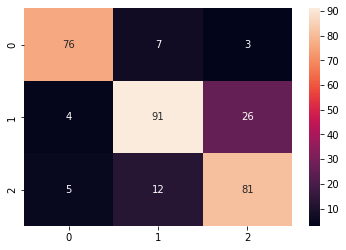

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(cf_matrix, annot=True)

In [5]:
import matplotlib.pyplot as plt
d = pd.DataFrame({"Model": ["Decision Tree", "KNN", "SVM", "Random Forst"],
                  "train acc": [92.8067, 91.5373, 73.9069, 92.8067],
                  "Cross Val": [78.8732, 80.7042, 66.4788, 81.9718],
                  "Test": [81.3114, 79.6721, 71.4754, 81.6393]})
d


,Model,train acc,Cross Val,Test
0,Decision Tree,92.8067,78.8732,81.3114
1,KNN,91.5373,80.7042,79.6721
2,SVM,73.9069,66.4788,71.4754
3,Random Forst,92.8067,81.9718,81.6393


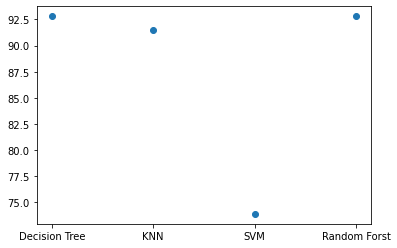

In [6]:
plt.scatter(d["Model"], d["train acc"])


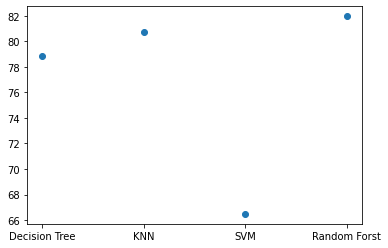

In [7]:
plt.scatter(d["Model"], d["Cross Val"])

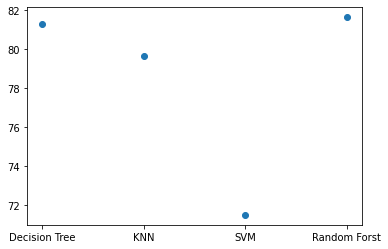

In [8]:
plt.scatter(d["Model"], d["Test"])